# Exploratory Data Analysis using R

## Project for MSc. 'Data Science and Machine Learning' in NTUA 

#### Dataset Used: Salaries.csv 
(contains 2008-09 nine-month academic salary for Assistant Professors (AsstProf), Associate Professors(AssocProf) and Professors (Prof) in a college in the U.S.)

---


## Import of dataset with R

Install libraries

In [26]:
# Install necessary libraries
#install.packages(c("data.table", "ggplot2", "ggcorrplot", "ggpubr"))
packages <- c("data.table", "ggplot2", "ggcorrplot", "ggpubr")
lapply(packages, require, character.only = TRUE)
# library(ggplot2)

Loading required package: data.table


Loading required package: ggcorrplot


Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggcorrplot’”

Loading required package: ggpubr


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] FALSE

[[4]]
[1] TRUE

Load dataset correctly

In [17]:
# Read the data into R
initial <- read.table("Salaries.csv", nrows = 10, sep = " ", header = T)
classes <- sapply(initial,class)
classes
salaries <- read.table("Salaries.csv", sep = " ", header = T, colClasses = classes, nrows = 400, comment.char = "")
classes[1]
head(salaries)
dim(salaries)

rank    discipline yrs.since.phd   yrs.service           sex 
     "factor"      "factor"     "integer"     "integer"      "factor" 
       salary 
    "integer"

rank 
"factor"

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
,<fct>,<fct>,<int>,<int>,<fct>,<int>
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
6,AssocProf,B,6,6,Male,97000


[1] 397   6

In [18]:
# Make sure that each variable has the correct type
nrow(salaries[!sapply(salaries$salary,is.numeric),])
nrow(salaries[!sapply(salaries$yrs.service,is.numeric),])
nrow(salaries[!sapply(salaries$rank,is.factor),])
nrow(salaries[!sapply(salaries$discipline,is.factor),])
nrow(salaries[!sapply(salaries$sex,is.factor),])

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [19]:
# Qualitative variables: rank,sex,discipline
unique(salaries$rank)
unique(salaries$discipline)
salaries <- within(salaries, {
    rank <- factor(rank, labels = c("Associate Professor", "Assistant, Professor", "Professor"))
    discipline <- factor(discipline, labels = c("Theoretical", "Applied"))
    sex <- factor(sex)
    yrs.since.phd <- salaries$yrs.since.phd
    yrs.service <- salaries$yrs.service
    salary <- salaries$salary
})

[1] Prof      AsstProf  AssocProf
Levels: AssocProf AsstProf Prof

[1] B A
Levels: A B

## Exploratory Data Analysis

### General Analysis Of Data

In [20]:
# Summary of dataset
summary(salaries)

# Frequency of each category
aggregate(salaries$salary,
          by = list(rank=salaries$rank,
          discipline=salaries$discipline,
          gender=salaries$sex),
          FUN = length)

                   rank           discipline  yrs.since.phd    yrs.service   
 Associate Professor : 64   Theoretical:181   Min.   : 1.00   Min.   : 0.00  
 Assistant, Professor: 67   Applied    :216   1st Qu.:12.00   1st Qu.: 7.00  
 Professor           :266                     Median :21.00   Median :16.00  
                                              Mean   :22.31   Mean   :17.61  
                                              3rd Qu.:32.00   3rd Qu.:27.00  
                                              Max.   :56.00   Max.   :60.00  
     sex          salary      
 Female: 39   Min.   : 57800  
 Male  :358   1st Qu.: 91000  
              Median :107300  
              Mean   :113706  
              3rd Qu.:134185  
              Max.   :231545  

rank,discipline,gender,x
<fct>,<fct>,<fct>,<int>
Associate Professor,Theoretical,Female,4
"Assistant, Professor",Theoretical,Female,6
Professor,Theoretical,Female,8
Associate Professor,Applied,Female,6
"Assistant, Professor",Applied,Female,5
Professor,Applied,Female,10
Associate Professor,Theoretical,Male,22
"Assistant, Professor",Theoretical,Male,18
Professor,Theoretical,Male,123


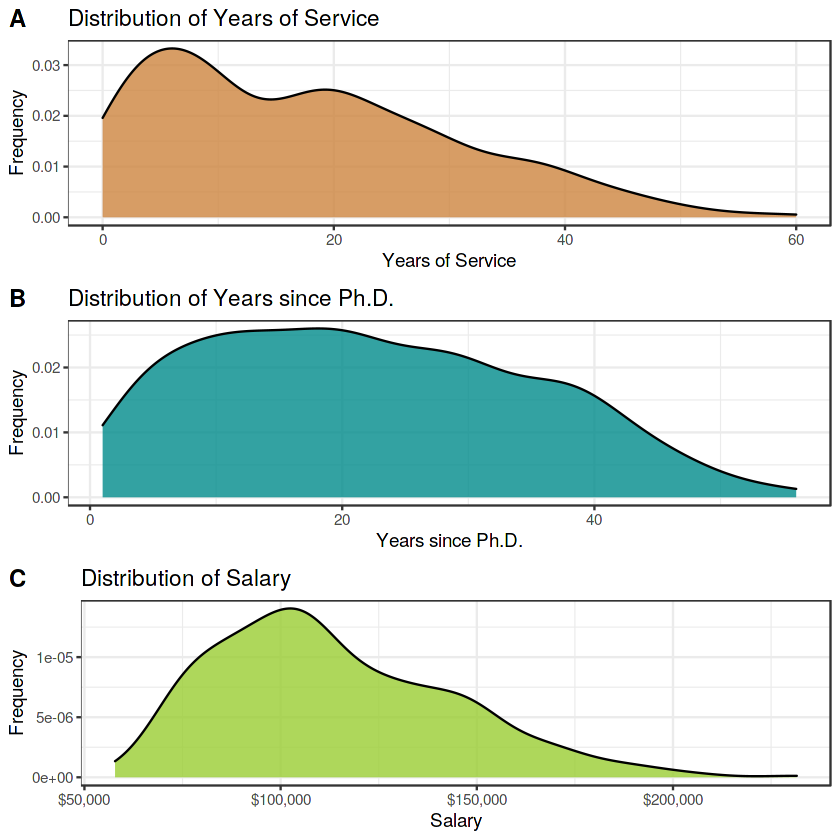

In [27]:
# Αpply bw theme
theme_set(theme_bw())
#1 Distribution of quantitative variables
g1 <- ggplot(salaries, aes(x = yrs.service)) +
    geom_density(aes(fill=yrs.service), alpha=0.8,fill = "tan3") +
    labs(x = "Years of Service", y = "Frequency",
        title = "Distribution of Years of Service")

g2 <- ggplot(salaries, aes(x = yrs.since.phd)) +
    geom_density(aes(fill=yrs.since.phd), alpha=0.8,fill = "cyan4") +
    labs(x = "Years since Ph.D.", y = "Frequency",
        title = "Distribution of Years since Ph.D.")

g3 <- ggplot(salaries, aes(x = salary)) +
    geom_density(aes(fill=salary), alpha=0.8,fill = "yellowgreen") +
    labs(x = "Salary", y = "Frequency",
        title = "Distribution of Salary") + scale_x_continuous(label = scales::dollar)

ggarrange(g1, g2, g3, labels = c("A", "B", "C"), ncol = 1, nrow = 3)

`geom_smooth()` using formula 'y ~ x'


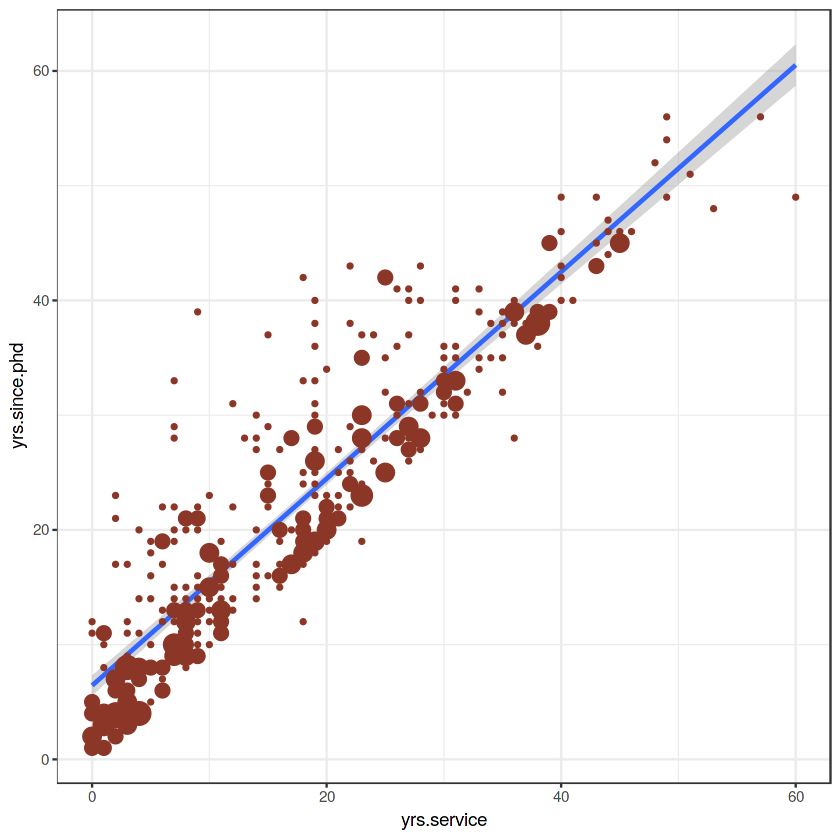

In [28]:
#2 Correlation
g <- ggplot(salaries, aes(x=yrs.service, y=yrs.since.phd)) +
    geom_smooth(method="lm") +geom_count(col="tomato4", show.legend=F)
plot(g)

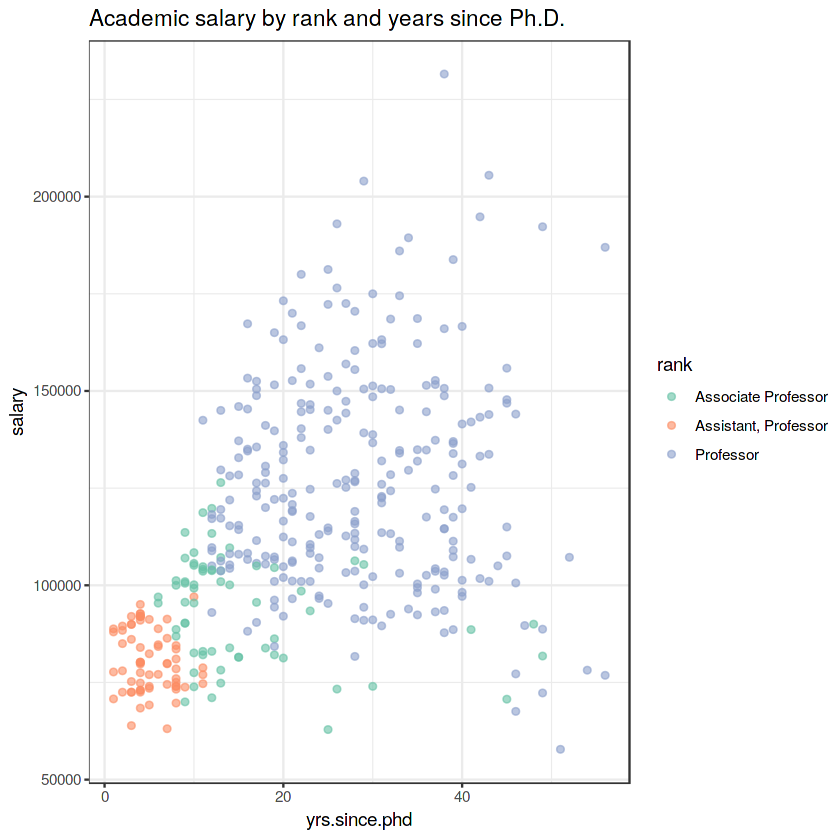

In [29]:
#3 Academic salary by rank and years since Ph.D.
ggplot(salaries,
    aes(x = yrs.since.phd, y = salary,
        color = rank)) + geom_point(alpha = .6) +
    scale_color_brewer(palette = "Set2") +
    labs(title = "Academic salary by rank and years since Ph.D.")

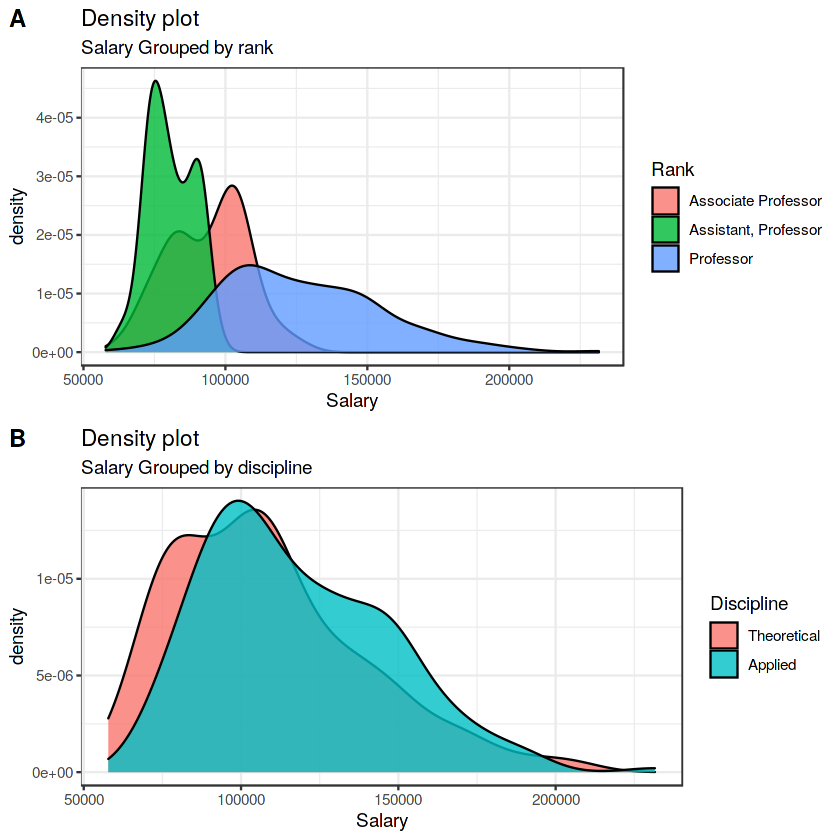

In [31]:
#4 Density Plots
g1 <- ggplot(salaries, aes(salary)) +
    geom_density(aes(fill=factor(rank)), alpha=0.8) +
    labs(title="Density plot", subtitle="Salary Grouped by rank",
        x="Salary", fill="Rank")

g2 <- ggplot(salaries, aes(salary)) +
    geom_density(aes(fill=factor(discipline)), alpha=0.8) +
    labs(title="Density plot", subtitle="Salary Grouped by discipline",
        x="Salary", fill="Discipline")

ggarrange(g1, g2, labels = c("A", "B"), ncol = 1, nrow = 2)

### Analysis Of Data Based On Main Question: 'Differences in salaries between male and female professors'

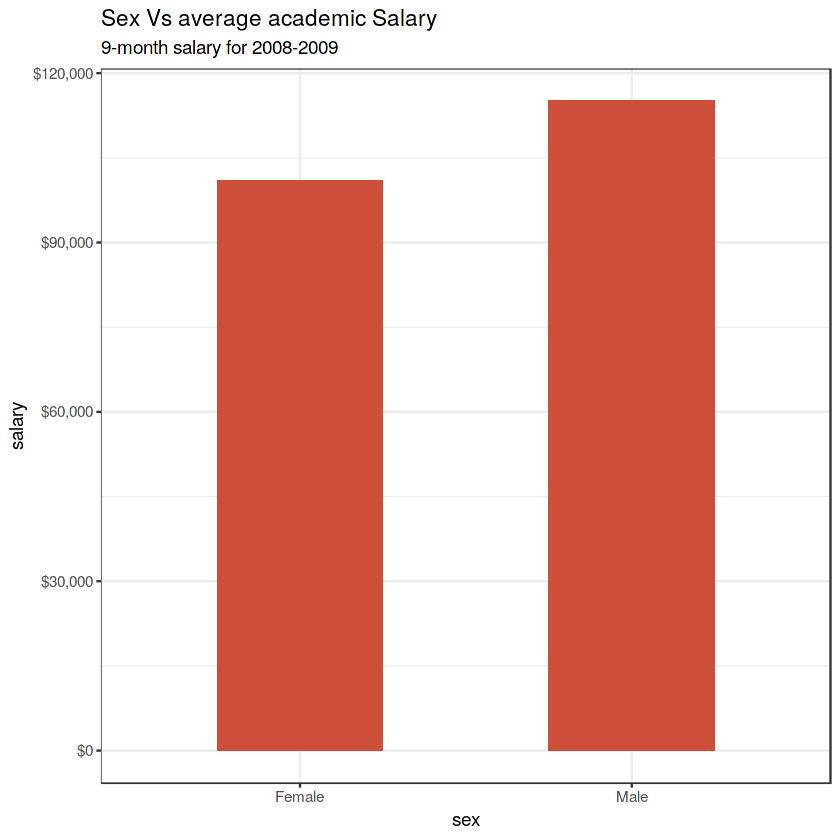

In [32]:
#1 Avg salaries vs sex
salary_per_sex <- aggregate(salaries$salary, by=list(salaries$sex), FUN=mean)
colnames(salary_per_sex) <- c('sex', 'salary') # Change column names
salary_per_sex <- salary_per_sex[order(salary_per_sex$salary), ] # Sort

ggplot(salary_per_sex, aes(x=sex, y=salary)) +
    geom_bar(stat="identity", width=.5, fill="tomato3") +
    labs(title="Sex Vs average academic Salary", subtitle = "9-month salary for 2008-2009") +
    scale_y_continuous(label = scales::dollar)

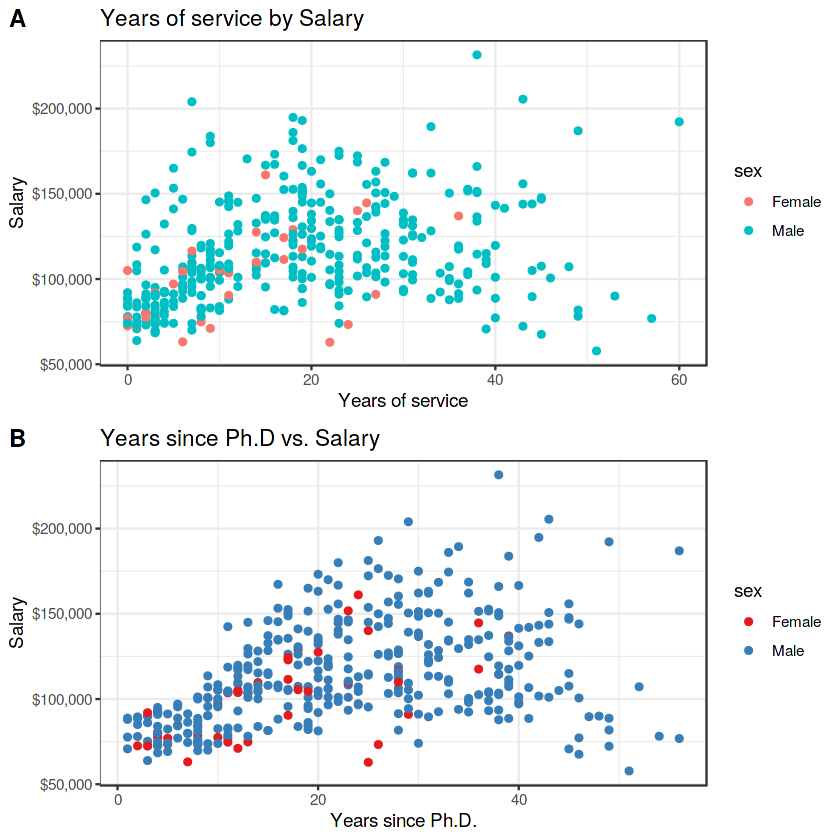

In [33]:
#2 Salary vs years.since.phd, years.of.service, by Sex
g1 <- ggplot(salaries, aes(x = yrs.service, y = salary, color = sex)) +
    geom_point() + scale_y_continuous(label = scales::dollar) +
    labs(title = "Years of service by Salary", x = "Years of service", y = "Salary")

g2 <- ggplot(salaries, aes(x = yrs.since.phd, y = salary, color = sex)) +
    geom_point() + scale_y_continuous(label = scales::dollar) +
    labs(title = "Years since Ph.D vs. Salary", x = "Years since Ph.D.", y = "Salary") + 
    scale_color_brewer(palette = "Set1")

ggarrange(g1, g2, labels = c("A", "B"), ncol = 1, nrow = 2)

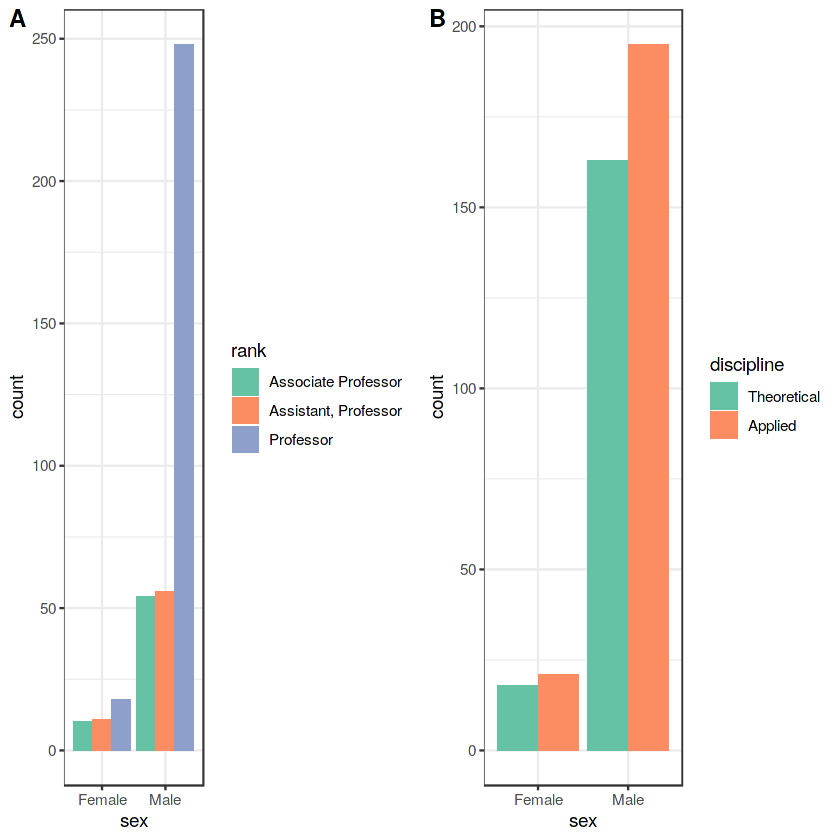

In [34]:
#3 Histograms on rank,discipline, by Sex
g1 <- ggplot(salaries, aes(x = sex,fill=rank)) +
    geom_bar(position = "dodge")+
    scale_fill_brewer(palette = "Set2")

g2 <- ggplot(salaries, aes(x = sex,fill=discipline)) +
    geom_bar(position = "dodge") +
    scale_fill_brewer(palette = "Set2")

ggarrange(g1, g2, labels = c("A", "B"), ncol = 2, nrow = 1)

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


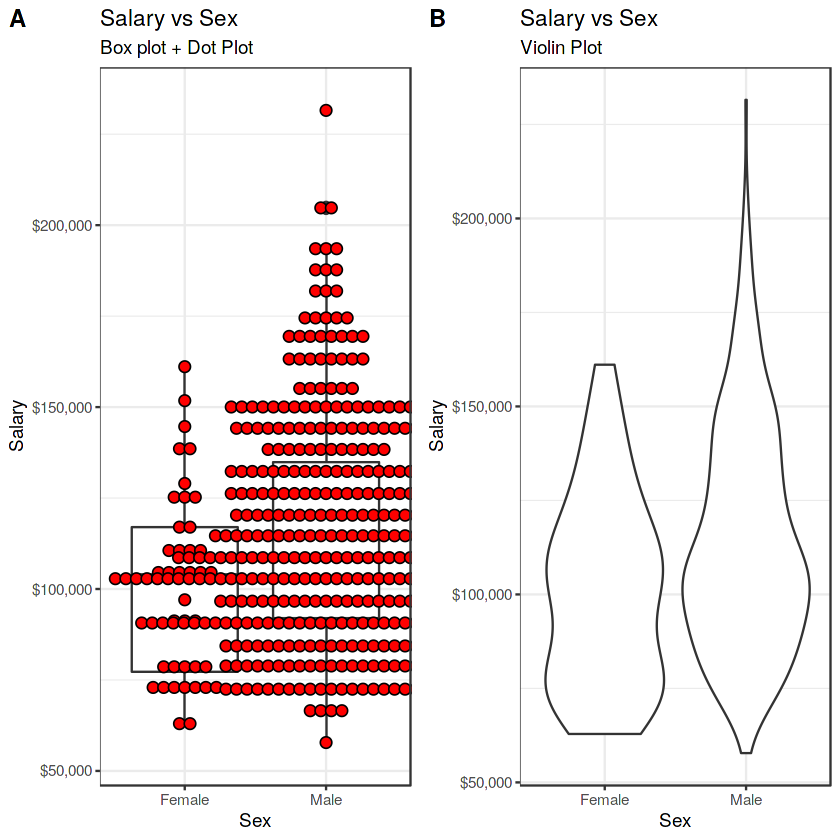

In [35]:
#4 Box-Dot plot + Violin plot for salary vs Sex
g1 <- ggplot(salaries, aes(sex, salary)) +
    geom_boxplot() + scale_y_continuous(label = scales::dollar) +
    geom_dotplot(binaxis='y', stackdir='center', dotsize = .5, fill="red") +
    labs(title="Salary vs Sex",
        subtitle="Box plot + Dot Plot",
        x="Sex", y="Salary")

g2 <- ggplot(salaries, aes(sex, salary)) +
    geom_violin() + scale_y_continuous(label = scales::dollar) +
    labs(title="Salary vs Sex", subtitle="Violin Plot",
        x="Sex", y="Salary")

ggarrange(g1, g2, labels = c("A", "B"), ncol = 2, nrow = 1)